# Data Science and Business Analytics Intern at The Spark Foundation GRIPMarch21

## Task 1 : Prediction using Supervised ML

### Predict the percentage of a student based on the number of study hours
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Karan Babu Daroga

**Not for distribution.**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Libraries imported successfully")

Libraries imported successfully


## Reading the data from github repository

In [7]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## Data Exploration

In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
#Checing for any missing values 

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [20]:
#Checking the Correlation between the given Hours and Scores

data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows higher correlation between Hours and Scores

## Data Visualization 

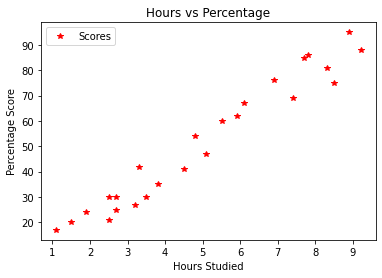

In [21]:
#Visualizing with scatter plot 

data.plot(x='Hours', y='Scores', style='*',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph we can say that there is a positive linear relationship between the number of hours studied and scores.





## Data Modelling 

We now divide the data into attributes and labels. Attributes are the independent variables and labels are dependent variables. Dependent variables are the ones whose values are predicted. From our dataset we want to predict the percentage score for the hours studied. Hence attributes will be the "Hours" column and labels will be the "Score" column.

In [22]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [23]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [24]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.  This will split 80 % of the data to training data set and 20 % of the data to the test data set

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=2)

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training completed.")
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Training completed.
Coefficients: [9.94061514]
Intercept: 1.5079104828268726


Plotting the fit line over the data in single linear regression 

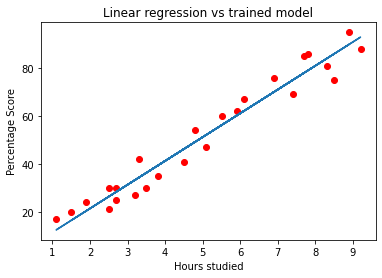

In [28]:
line = regressor.coef_*X+regressor.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(X, y,color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(X, line);
plt.show()

Blue line is the best fit line for this data

## Predictions

After training our algorithms. We will now make the predictions. y_pred is a numpy array that contains all the predicted values for the input values in the X_test series

In [29]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [30]:
y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


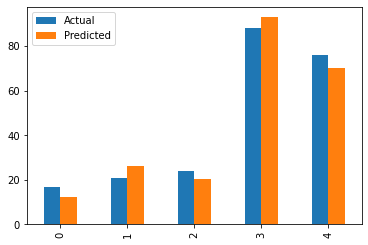

In [32]:
df.plot(kind='bar')

In [33]:
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = regressor.predict([[9.5]])
print("Hours studied = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Hours studied = 9.25
Predicted Score = 95.94375434264262


## Model Evaluation 

There are 3 main metrics for model evaluation in regression:
1. R Square/Adjusted R Square
2. Mean Square Error (MSE)/Root Mean Square Error (RMSE)
3. Mean Absolute Error (MAE)

R Square/Adjusted R Square are better used to explain the accuracy because we can explain how well the regression predictions approximate the real data points. MSE, RMSE or MAE are better to be used to compare performance between different regression models

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2_Score: %.2f" % r2_score(y_test,y_pred))

R2_Score: 0.97


Higher the r2 value, higher is the acccuracy of the model. r2 ranges from 0-1.

In [36]:
print('Mean Absolute Error Is : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error Is : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error Is : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error Is :  4.877039354964484
Mean Squared Error Is :  24.38762033985666
Root Mean Squared Error Is :  2.2084019912517023
